Diabetics Prediction using Logistic Regression in Python

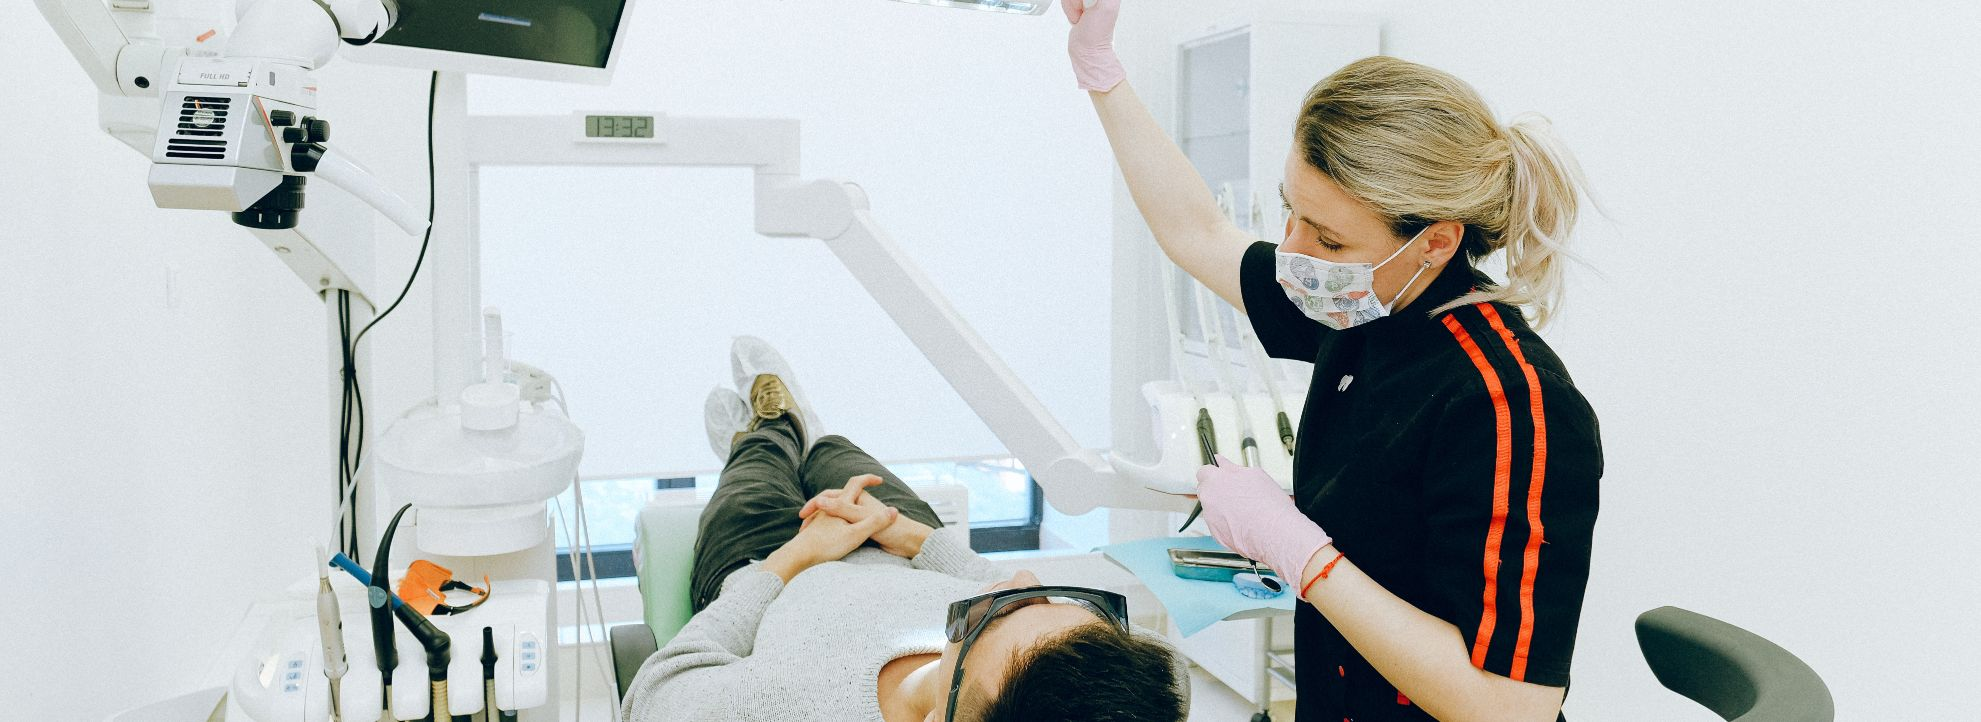

Based on Linear regression, Logistic regression is a classification method that estimates the probability of an event occurring based on binary class or multi-class target variables such as **[sick]** or **[not sick] **given dataset of independent variables. In this project, I'll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

Import Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# for plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# calculate accuracy measure and confussion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# for google table
from google.colab import data_table
data_table.enable_dataframe_formatter()


Data Injestion

In [12]:
df_diab = pd.read_csv('health_care_diabetes.csv')
df_diab.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
450,1,82,64,13,95,21.2,0.415,23,0
221,2,158,90,0,0,31.6,0.805,66,1
730,3,130,78,23,79,28.4,0.323,34,1
405,2,123,48,32,165,42.1,0.520,26,0
181,0,119,64,18,92,34.9,0.725,23,0
375,12,140,82,43,325,39.2,0.528,58,1
90,1,80,55,0,0,19.1,0.258,21,0
439,6,107,88,0,0,36.8,0.727,31,0
57,0,100,88,60,110,46.8,0.962,31,0
433,2,139,75,0,0,25.6,0.167,29,0
